In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'menuagg.png',
 'Starbuck Menu Analysis.ipynb',
 'starbucks-menu-nutrition-drinks.csv',
 'starbucks-menu-nutrition-food.csv',
 'starbucks_drinkMenu_expanded.csv']

In [3]:
drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
food = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='ISO-8859-1')
menu = pd.read_csv('starbucks_drinkMenu_expanded.csv')

## Wrangling

#### Drinks

In [4]:
drinks.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [5]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [6]:
drinks = drinks.rename(columns = {'Unnamed: 0':'Drink', 'Protein':'Protein (g)', 'Sodium':'Sodium (g)'})

In [7]:
drinks = drinks.replace('-', np.nan)

In [8]:
drinks = drinks.dropna()

In [9]:
drinks[['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)', 'Sodium (g)']] = \
drinks[['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)', 'Sodium (g)']].astype(float)

In [10]:
drinks.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium (g)
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


#### Food

In [11]:
food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [12]:
food = food.rename(columns = {'Unnamed: 0':'Food'})

In [13]:
food = food.replace('-', np.nan)

In [14]:
food = food.dropna()

In [15]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Food          113 non-null    object 
 1    Calories     113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.2+ KB


In [16]:
food.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.353982,41.486726,2.849558,11.469027
std,127.710685,8.297397,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


#### Menu

In [17]:
menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.00,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.00,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.00,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.02,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,0.1,0.0,0.20,0.0,75


In [18]:
menu = menu.rename(columns = {'Beverage_category':'Beverage Category', 'Beverage_prep':'Beverage Prep'})

In [19]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Beverage Category         242 non-null    object 
 1   Beverage                  242 non-null    object 
 2   Beverage Prep             242 non-null    object 
 3   Calories                  242 non-null    int64  
 4   Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)             242 non-null    float64
 6   Saturated Fat (g)         242 non-null    float64
 7   Sodium (mg)               242 non-null    int64  
 8   Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)          242 non-null    int64  
 10  Dietary Fibre (g)         242 non-null    int64  
 11  Sugars (g)                242 non-null    int64  
 12  Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)          242 non-null    float64
 14  Vitamin C 

In [20]:
menu = menu.replace(['-', 'varies', 'Varies'], np.nan)

In [21]:
menu = menu.dropna()

In [22]:
menu[['Caffeine (mg)']] = \
menu[['Caffeine (mg)']].astype(float)

In [23]:
menu.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,201.584475,3.074886,1.394977,0.039269,6.643836,137.374429,37.296804,0.844749,34.077626,7.294521,0.102922,0.037580,0.216758,0.080502,89.520548
std,102.353614,3.000590,1.685154,0.073018,8.832857,80.605714,20.926664,1.441077,19.971043,4.790546,0.082008,0.150388,0.145252,0.107734,64.726831
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,0.200000,0.100000,0.000000,0.000000,80.000000,21.000000,0.000000,19.000000,4.000000,0.040000,0.000000,0.100000,0.000000,50.000000
50%,190.000000,2.500000,0.500000,0.000000,5.000000,130.000000,36.000000,0.000000,33.000000,6.000000,0.080000,0.000000,0.200000,0.040000,75.000000
75%,270.000000,5.000000,2.000000,0.100000,10.000000,180.000000,53.000000,1.000000,44.000000,10.000000,0.150000,0.000000,0.300000,0.100000,142.500000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,0.500000,1.000000,0.600000,0.500000,410.000000


## EDA

In [103]:
sns.set_style("darkgrid", {'axes.grid' : False})

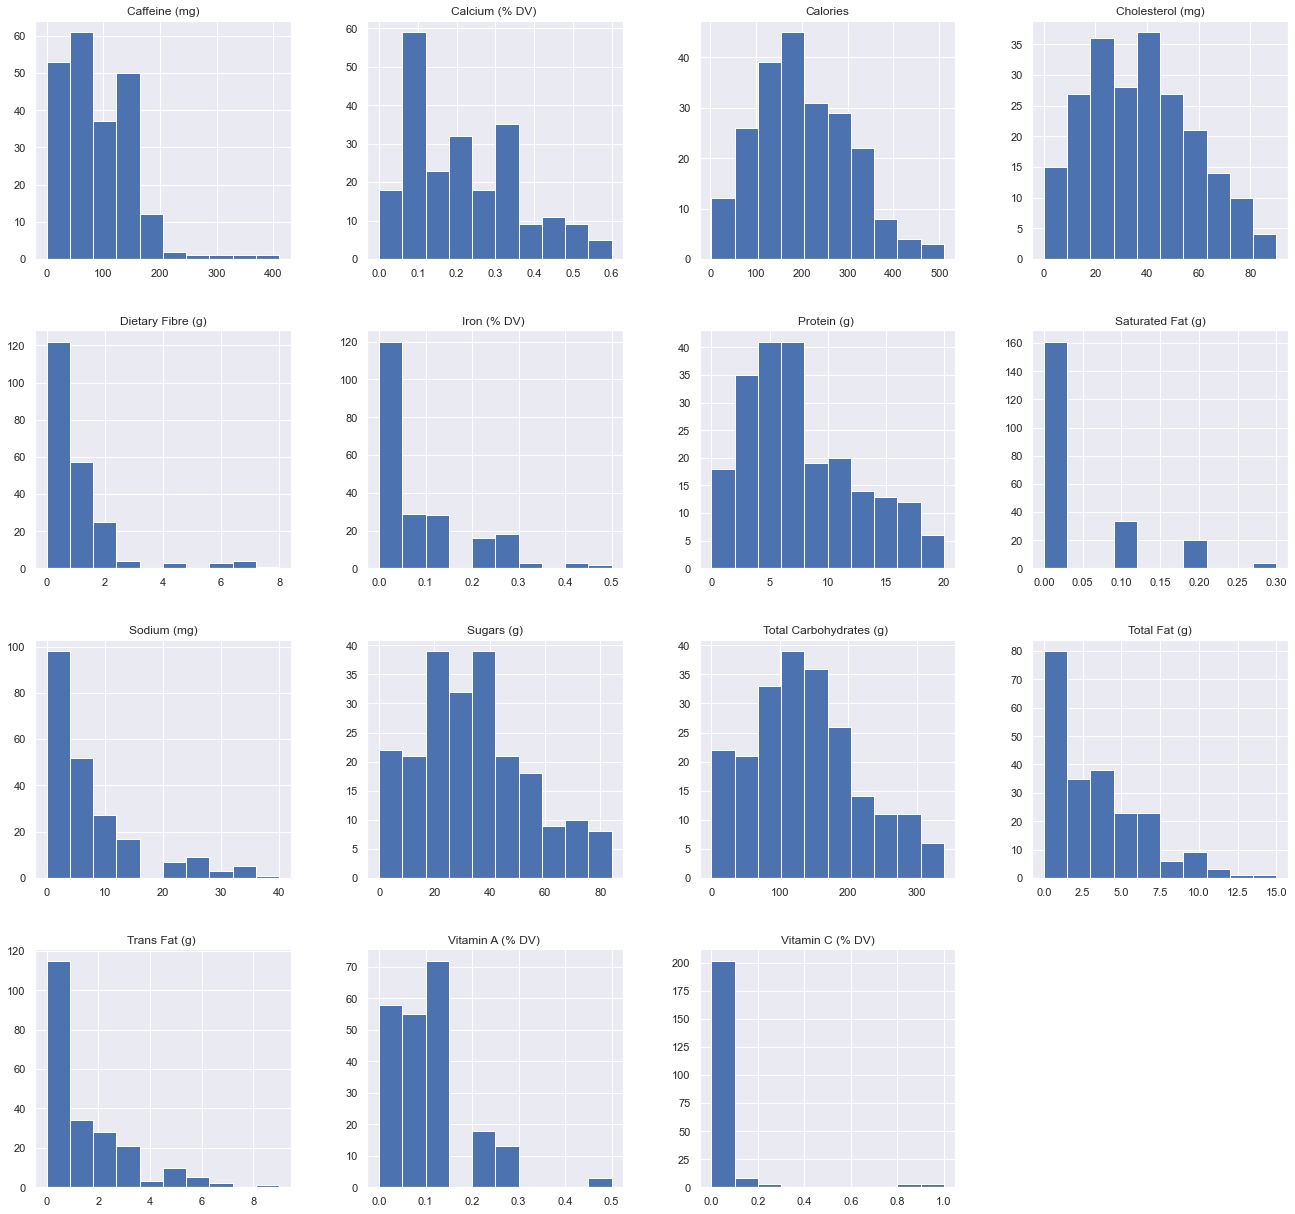

In [104]:
menu.hist(figsize=(20, 20))
plt.show()

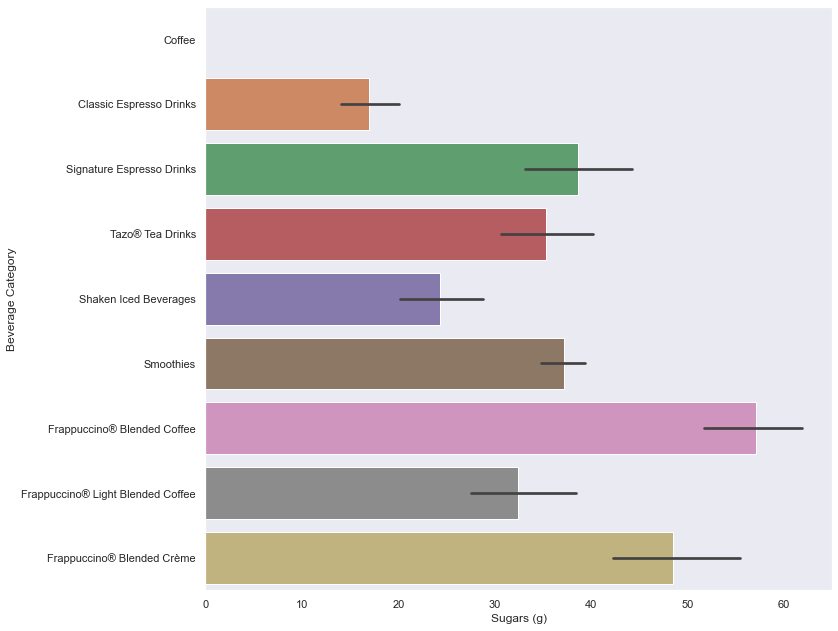

In [105]:
_ = plt.figure(figsize=(10, 10))
_ = sns.barplot(y='Beverage Category', x='Sugars (g)', orient='h', data=menu)
_ = plt.show()

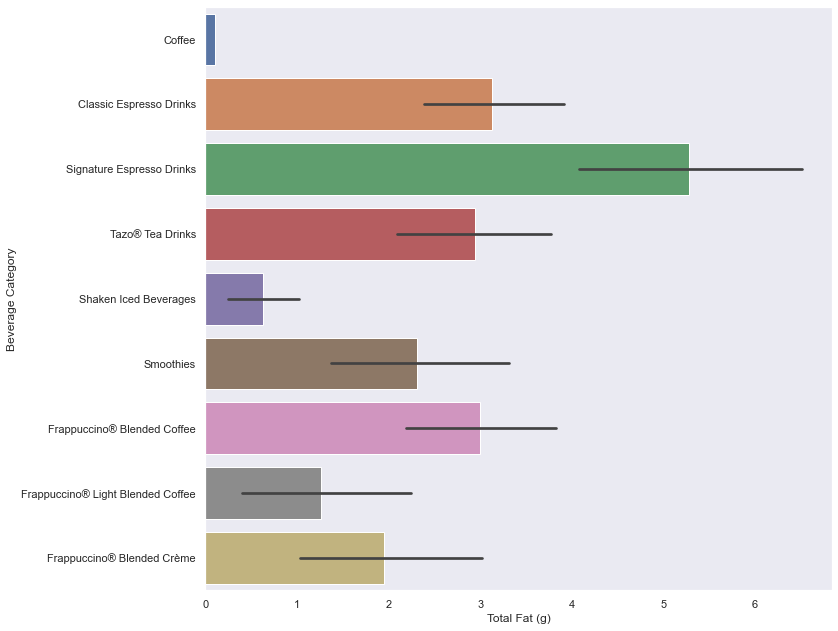

In [106]:
_ = plt.figure(figsize=(10, 10))
_ = sns.barplot(y='Beverage Category', x='Total Fat (g)', orient='h', data=menu)
_ = plt.show()

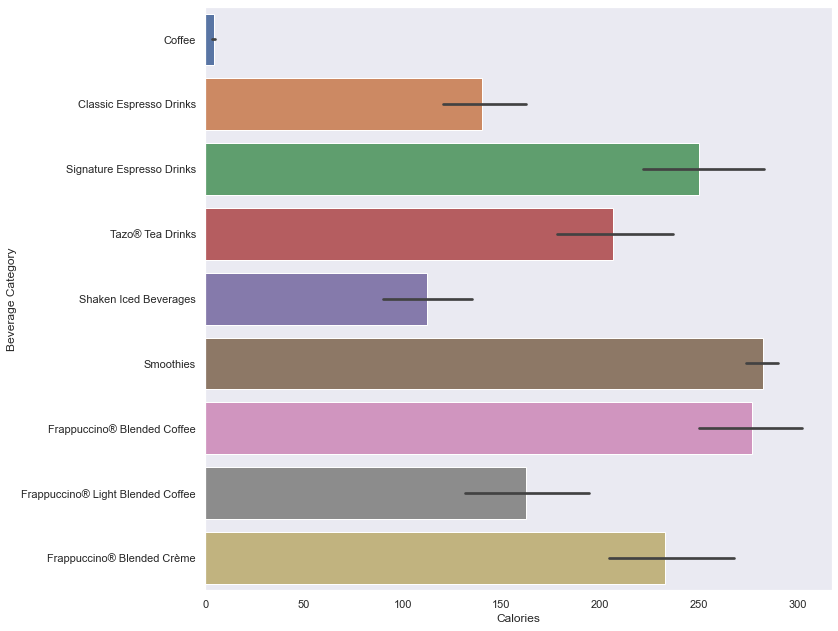

In [107]:
_ = plt.figure(figsize=(10, 10))
_ = sns.barplot(y='Beverage Category', x='Calories', orient='h', data=menu)
_ = plt.show()

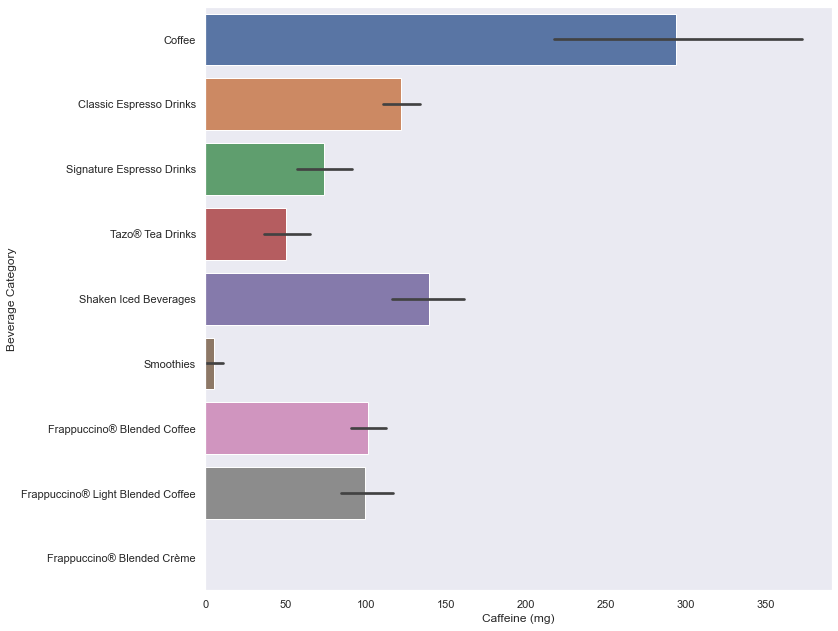

In [108]:
_ = plt.figure(figsize=(10, 10))
_ = sns.barplot(y='Beverage Category', x='Caffeine (mg)', orient='h', data=menu)
_ = plt.show()

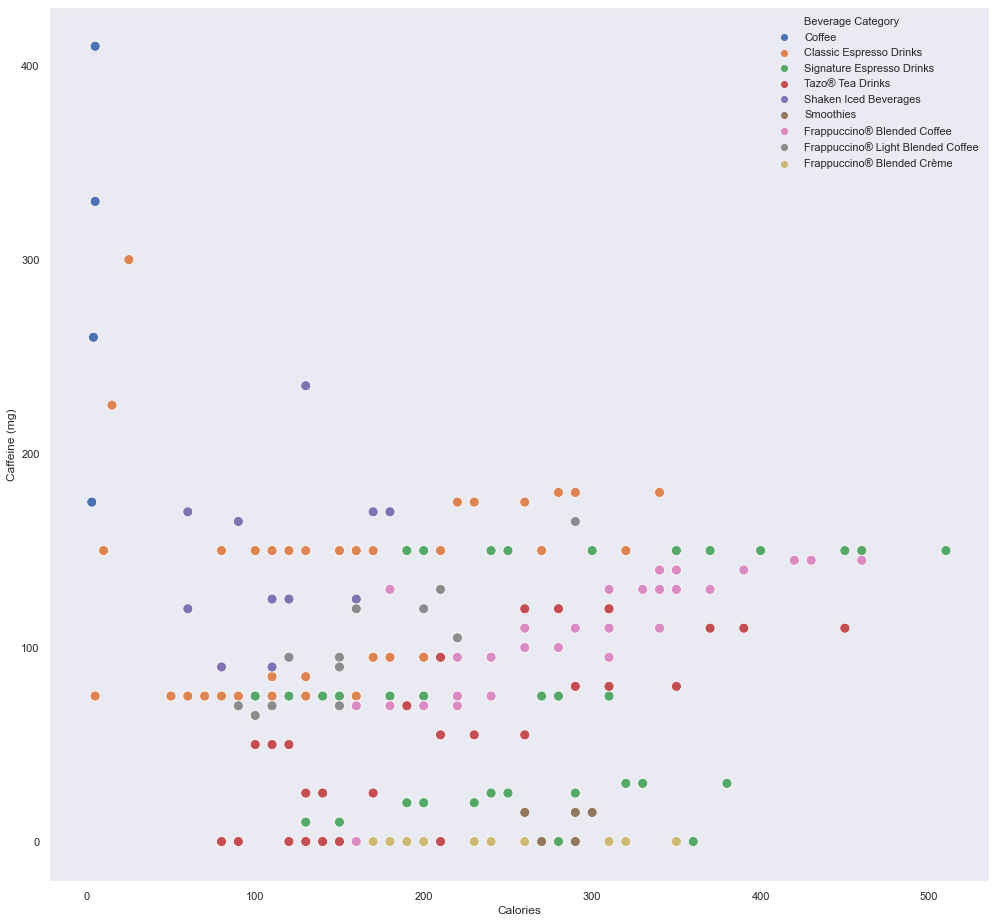

In [109]:
_ = plt.figure(figsize=(15, 15))
_ = sns.scatterplot(y='Caffeine (mg)', x='Calories', hue='Beverage Category', data=menu, s=100)
_ = plt.show()

In [181]:
menuagg = menu.groupby('Beverage Category').mean().astype(float)

In [151]:
menuagg.sort_values('Calories')

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage Category,,,,,,,,,,,,,,,
Coffee,4,0,0,0,0,8,0,0,0,0,0,0,0,0,293
Shaken Iced Beverages,112,0,0,0,1,25,24,0,24,1,0,0,0,0,139
Classic Espresso Drinks,140,3,1,0,8,104,20,0,16,8,0,0,0,0,122
Frappuccino® Light Blended Coffee,162,1,0,0,1,217,34,0,32,4,0,0,0,0,99
Tazo® Tea Drinks,206,2,0,0,8,104,37,0,35,7,0,0,0,0,50
Frappuccino® Blended Crème,233,1,0,0,4,188,49,0,48,4,0,0,0,0,0
Signature Espresso Drinks,250,5,2,0,9,138,42,0,38,9,0,0,0,0,73
Frappuccino® Blended Coffee,276,3,1,0,4,230,59,0,57,4,0,0,0,0,101
Smoothies,282,2,0,0,6,130,54,6,37,16,0,0,0,0,5


In [182]:
menuagg.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ', 'Vitamin A (% DV) ',
       'Vitamin C (% DV)', 'Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [183]:
menuagg = menuagg[['Calories', 'Cholesterol (mg)', \
         'Sugars (g)', 'Caffeine (mg)']]

In [184]:
menuagg = menuagg.sort_values('Calories')

In [185]:
menuagg = menuagg.reset_index(drop=False)

In [156]:
import dataframe_image as dfi

In [157]:
dfi.export(menuagg, 'menuagg.png')

In [166]:
sns.set()

In [178]:
sns.set_style("darkgrid", {'axes.grid' : False})

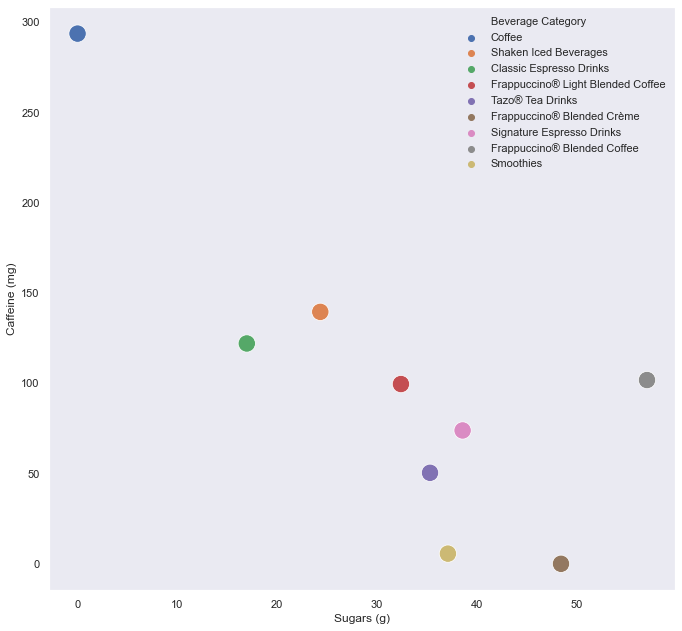

In [186]:
_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(y='Caffeine (mg)', x='Sugars (g)', hue='Beverage Category', data=menuagg, s=300)
_ = plt.show()

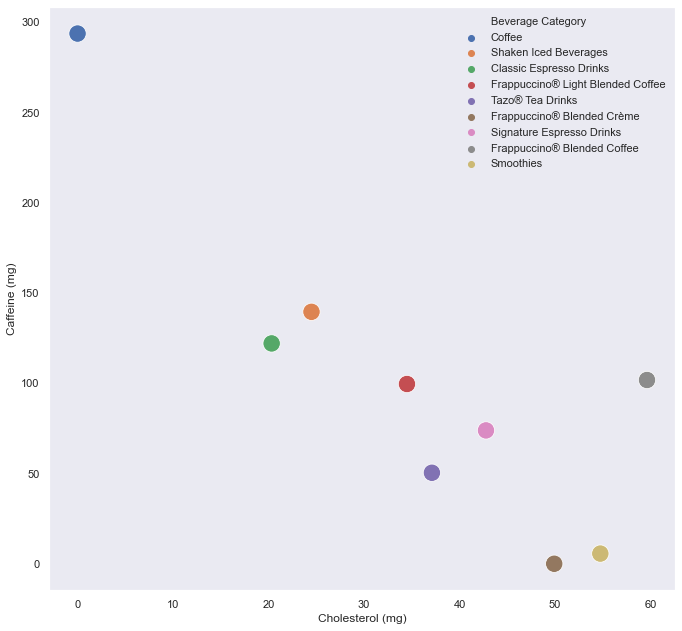

In [187]:
_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(y='Caffeine (mg)', x='Cholesterol (mg)', hue='Beverage Category', data=menuagg, s=300)
_ = plt.show()

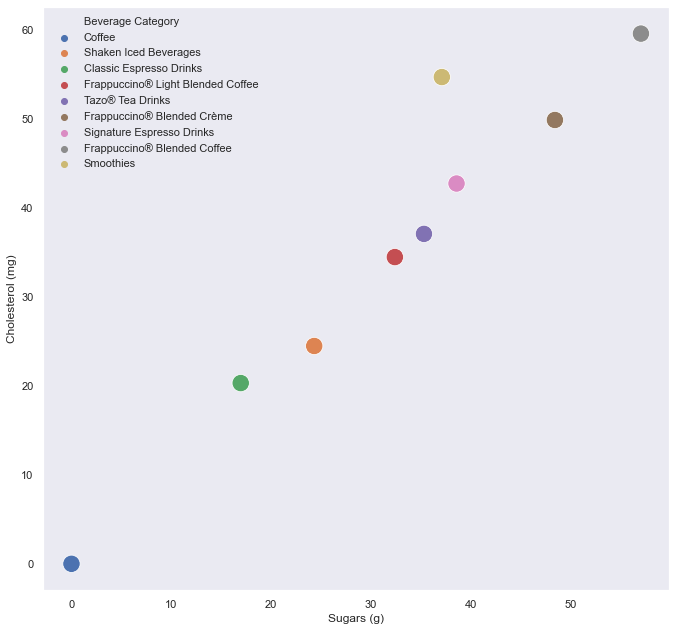

In [188]:
_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(y='Cholesterol (mg)', x='Sugars (g)', hue='Beverage Category', data=menuagg, s=300)
_ = plt.show()

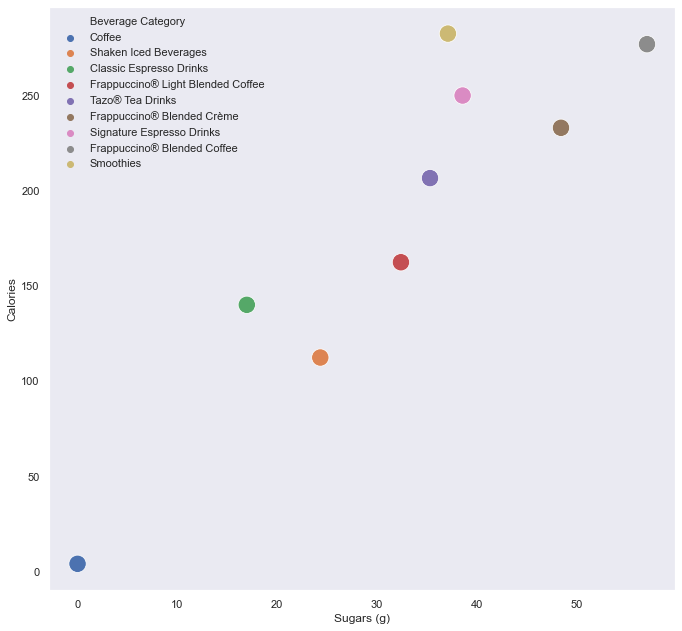

In [189]:
_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(y='Calories', x='Sugars (g)', hue='Beverage Category', data=menuagg, s=300)
_ = plt.show()

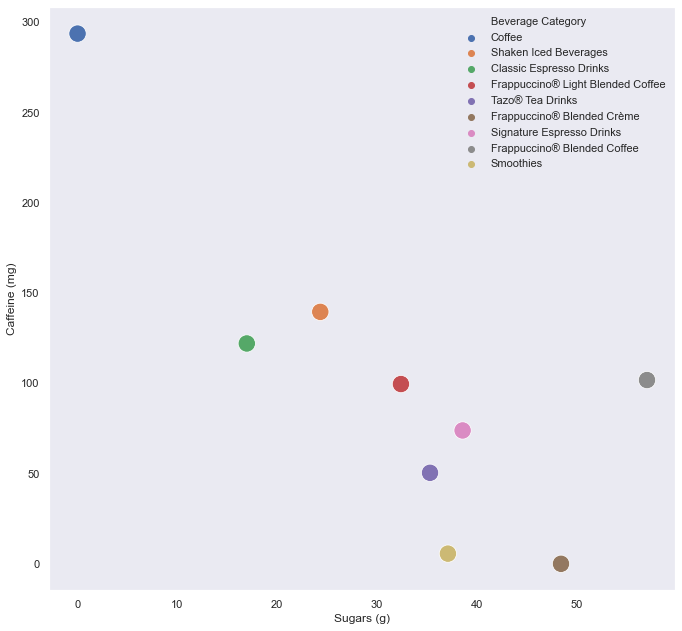

In [190]:
_ = plt.figure(figsize=(10, 10))
_ = sns.scatterplot(y='Caffeine (mg)', x='Sugars (g)', hue='Beverage Category', data=menuagg, s=300)
_ = plt.show()

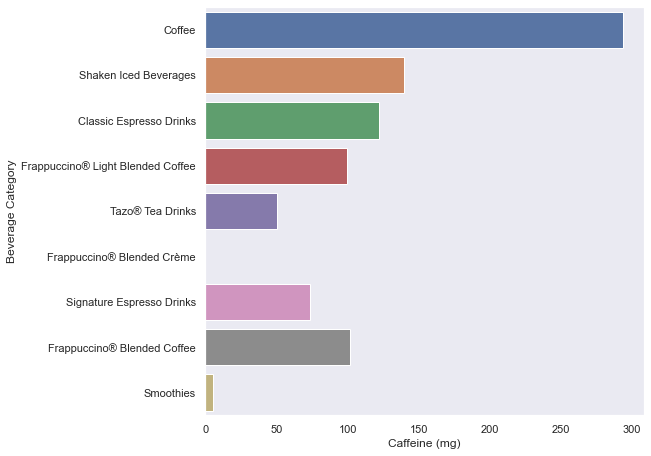

In [191]:
_ = plt.figure(figsize=(7, 7))
_ = sns.barplot(y='Beverage Category', x='Caffeine (mg)', orient='h', data=menuagg)
_ = plt.show()

In [160]:
import matplotlib.patches as mpatches

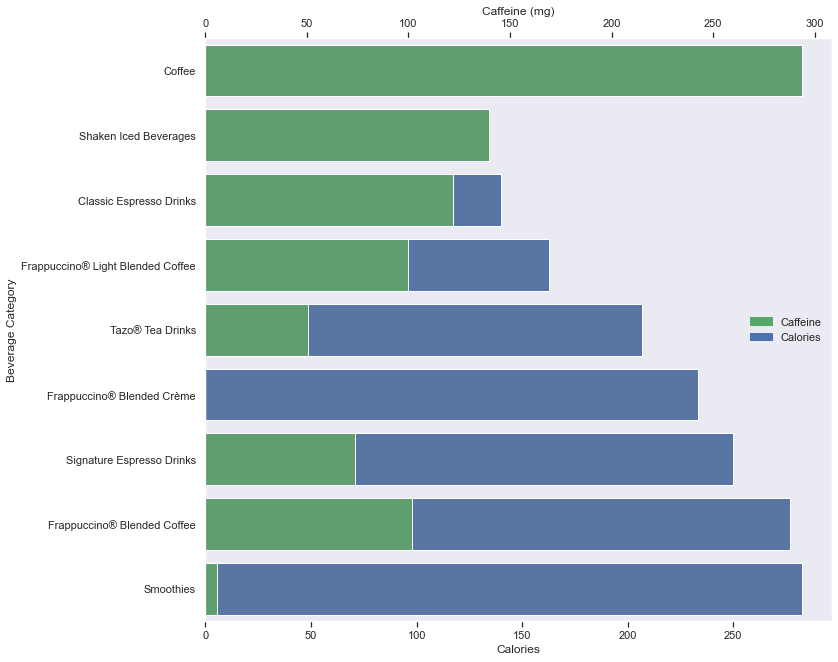

In [192]:
_ = plt.figure(figsize=(10, 10))
g1 = sns.barplot(x='Calories', y="Beverage Category", orient='h',\
                 data=menuagg, color='b')
ax2 = plt.twiny()
g2 = sns.barplot(x='Caffeine (mg)', y='Beverage Category', orient='h',
                 data=menuagg, ax=ax2, color='g')

blue = mpatches.Patch(color='g', label='Caffeine')
green = mpatches.Patch(color='b', label='Calories')

plt.legend(handles=[blue, green], loc=7)

plt.show()

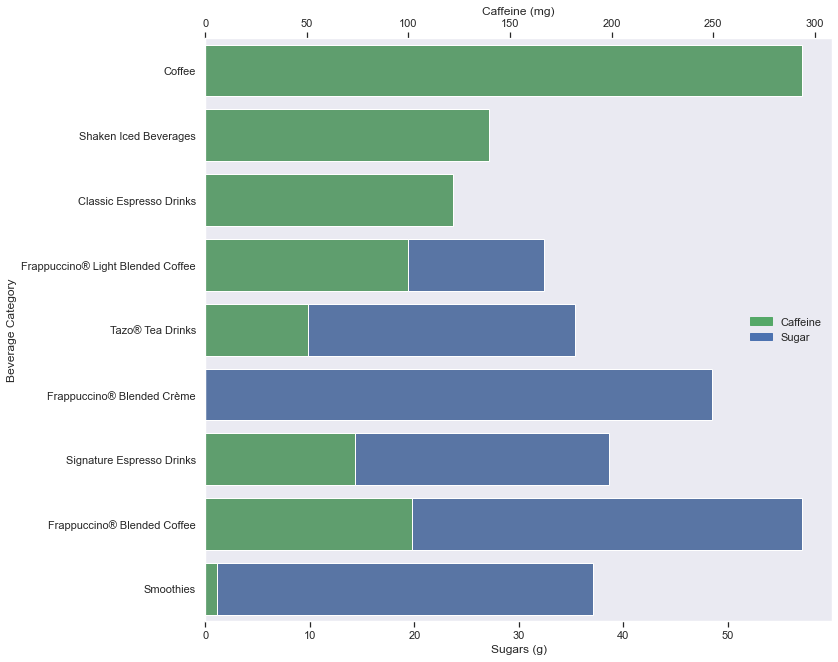

In [193]:
_ = plt.figure(figsize=(10, 10))
g1 = sns.barplot(x='Sugars (g)', y="Beverage Category", orient='h',\
                 data=menuagg, color='b')
ax2 = plt.twiny()
g2 = sns.barplot(x='Caffeine (mg)', y='Beverage Category', orient='h',
                 data=menuagg, ax=ax2, color='g')

blue = mpatches.Patch(color='g', label='Caffeine')
green = mpatches.Patch(color='b', label='Sugar')

plt.legend(handles=[blue, green], loc=7)

plt.show()

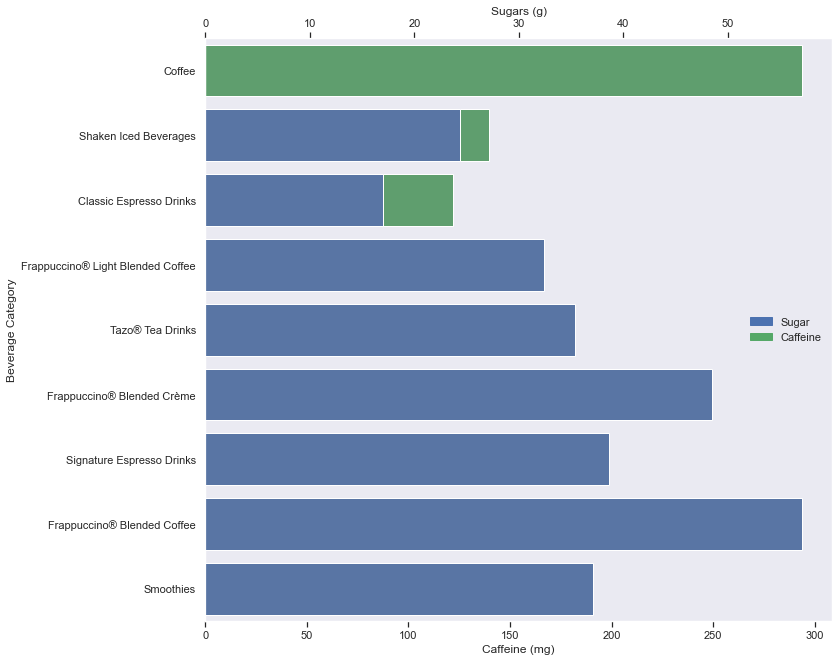

In [195]:
_ = plt.figure(figsize=(10, 10))
g1 = sns.barplot(x='Caffeine (mg)', y="Beverage Category", orient='h',\
                 data=menuagg, color='g')
ax2 = plt.twiny()
g2 = sns.barplot(x='Sugars (g)', y='Beverage Category', orient='h',
                 data=menuagg, ax=ax2, color='b')

blue = mpatches.Patch(color='b', label='Sugar')
green = mpatches.Patch(color='g', label='Caffeine')

plt.legend(handles=[blue, green], loc=7)

plt.show()